
# I.  PySpark RDD – Resilient Distributed Dataset

>

## I.1.  Overview

> PySpark's core component, RDD, provides a fault-tolerant, distributed collection of objects with immutability and logical partitioning, enabling parallel computation across cluster nodes.
RDDs are collections of objects like Python lists, but computed on multiple processes across physical servers, unlike Python collections which live and process in one process.


## I.2.  PySpark RDD Benefits

+ **In-Memory Processing:** PySpark loads data from disk and processes it in memory, unlike MapReduce which is I/O intensive.
+ **Immutability:** PySpark RDDs are immutable, meaning they cannot be modified once created.
+ **Fault Tolerance:** PySpark operates on fault-tolerant data stores like HDFS and S3, automatically reloading data from other partitions if any RDD operation fails.
+ **Lazy Evolution:** PySpark evaluates all transformations as it encounters them, not just the first RDD action.
+ **Partitioning:** By default, RDDs are partitioned to the number of available cores when created.

## I.3.  PySpark RDD Limitations

> PySpark RDDs are not suitable for web application storage systems that update state stores, as traditional update logging and data checkpointing systems like databases are more efficient. RDDs aim to provide an efficient programming model for batch analytics.

## I.4.   RDD Creation

> The two ways to create RDDs in PySpark are:
> + parallelizing an existing collection
> + Referencing a dataset in an external storage system such as HDFS, S3 (AWS), Azure, etc.

Before everything, we should first initialise a SparkSession (entry point of any PySpark Application) using the builder pattern method defined in SparkSession class.

**Note:** Creating SparkSession object, internally creates one SparkContext per JVM.

### Setting up the system environment for Windows & Linux

In [6]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

### Setting up the system environment for Mac

In [7]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8/Contents/Home"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [1]:

# Imports
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
      .master("local[*]") \
      .appName("PySparkApplication") \
      .getOrCreate()  

25/01/28 17:57:12 WARN Utils: Your hostname, Toms-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.69 instead (on interface en0)
25/01/28 17:57:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/28 17:57:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


>+ **Master():** Uses master name for cluster-run tasks, typically yarn or mesos.
>+ **Local[x]:** Determines number of partitions for RDDs in Standalone mode. Ideally, match CPU cores for optimal performance.
>+ **AppName():** Sets application name.
>+ **getOrCreate():** Returns existing SparkSession object or creates new one if not present.

### I.4.1.  Using sparkContext.parallelize() 

> The parallelize() function of SparkContext allows for the creation of an RDD by loading the existing collection from the driver program, which is necessary when data is already in memory from a file or database.

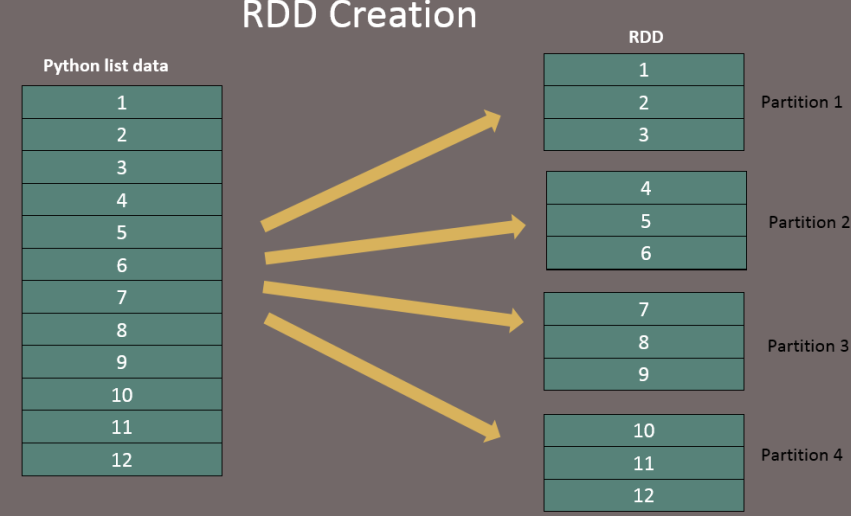

In [ ]:
# Create RDD from parallelize    


 > To make it simple for this PySpark RDD course we are using files from the local system or loading it from the python list to create RDD.

### I.4.2.  Using sparkContext.textFile()

>Use the **textFile()** method to read a *.txt* file into RDD.

In [ ]:
path = "C:/Users/owner/OneDrive/Data Engineering/data_eng.txt"  # Replace this path with yours

In [ ]:
# Create RDD from external Data source


### I.4.3.  Using sparkContext.wholeTextFiles()

> **wholeTextFiles()** function returns a PairRDD with the key being the file path and the value being file content.

In [ ]:

# Read entire file into a RDD as single record.


### I.4.4.  Create empty RDD using sparkContext.emptyRDD

> Using **emptyRDD()** method on sparkContext we can create an RDD with no data. This method creates an empty RDD with no partition.

In [ ]:
# Create an empty RDD with no partition    



### I.4.5.  Creating empty RDD with partition

> Sometimes we may need to write an empty RDD to files by partition, In this case, you should create an empty RDD with partition.

In [ ]:
# Create empty RDD with partition



## I.5.   RDD Partitions

>When we use parallelize(), textFile() or wholeTextFiles() methods of SparkContxt to initiate RDD, it automatically splits the data into partitions based on resource availability. When you run it on a laptop, it creates partitions as the same number of cores available on your system.

**getNumPartitions()** – This is an RDD function that returns a number of partitions your dataset split into.

In [ ]:
# Get partition count



**Set parallelize manually** – We can also set a number of partitions manually, all we need is to pass a number of partitions as the second parameter to these functions for example;

In [ ]:
# Set partitions manually



## I.6.  Repartition and Coalesce

>Sometimes, we may need to repartition the RDD, PySpark provides two ways to repartition; first using **repartition()** method, which shuffles data from all nodes also called *full shuffle* and second **coalesce()** method which shuffles data from minimum nodes, for examples if you have data in 4 partitions and doing coalesce(2) moves data from just 2 nodes.  

>Both of these functions take the number of partitions to repartition RDD as shown below.  Note that repartition() method is a very expensive operation as it shuffles data from all nodes in a cluster.

**Note:** *repartition()* or *coalesce()* methods also return a new RDD.

In [ ]:
# Repartition the RDD




In [ ]:
# Stop "PySparkApplication"
spark.stop()

## I.7. PySpark RDD Operations

>RDD operations are the core transformations and actions performed on RDDs

>**RDD transformations** – Transformations are lazy operations; instead of updating an RDD, these operations return another RDD.
>
>**RDD actions** – operations that trigger computation and return RDD values.

### I.7.1.  Common RDD Transformations functions with example

**a) flatmap() function**

The flatMap() transformation in the RDD API flattens the resulting RDD after applying a function to each element, producing a new RDD. In the provided example below, each record is initially split by space within an RDD, and subsequently, the transformation flattens it. The resulting RDD comprises individual records, each containing a single word.”

In [ ]:
# Creating a new Spark session

from pyspark.sql import SparkSession

spark_rdd = SparkSession.builder\
    .config("spark.driver.host", "localhost")\
    .appName('RDD_Transformations')\
    .getOrCreate()


In [ ]:
# Create RDD

file_path = "C:/Users/owner/OneDrive/Data Engineering/RDD_trans.txt"



In [ ]:
# Print RDD



In [ ]:
# Using flatMap()



In [ ]:
# Applying collect() to see the output


**b) map() function**

>The map() transformation is used to perform various complex operations, such as adding or updating an element. The result of map t>ransformations retains the same number of records as the input.
>
>In our word count example, we are adding a new column with value 1 for each word, the result of the RDD is PairRDDFunctions which >contains key-value pairs, word of type String as Key and 1 of type Int as value.

In [ ]:
# Using map()



**NOTE:** The flatMap() transformation is similar to the map() transformation but with one key difference: it allows each input element to map to zero or more output elements.

**c) reduceByKey() function**

>The *reduceByKey()* combines the values associated with each key using the provided function. In our scenario, it aggregates the word strings by using the sum function on the corresponding values. The result of our RDD outcome comprises distinct words along with their respective counts.

In [ ]:
# Use reduceByKey()




**d) sortByKey() function**

>*sortByKey()* transformation is used to sort RDD elements on key. In our example, first, we convert RDD[(String,Int]) to RDD[(Int,String]) using map transformation and later apply sortByKey which ideally does sort on an integer value. And finally, foreach with println statement prints all words in RDD and their count as key-value pair to console.

In [ ]:
# sortByKey()




**e) filter() function**

>*filter()* transformation is used to filter the records in an RDD. In our example we are filtering all words starts with “o”.

In [ ]:
# filter()




### I.7.2.  Common RDD Actions functions with example

RDD Action operations trigger the execution of transformations on RDDs (Resilient Distributed Datasets) and produce a result that can be either returned to the driver program or saved to an external storage system.

We will continue to use our word count example and perform some actions on it

**a) count() function**

>Returns the number of records in an RDD

In [ ]:

# Action - count




**b) first() function**

>Returns the first record.

In [ ]:
# Action - first




**c) max() function**

>Returns max record.

In [ ]:
# Action - max
data = [34,2,56,9,10,41,837]




**d) reduce() function**

>Reduces the records to single, we can use this to count or sum.

In [ ]:
# Action - reduce



**d) take() function**

>Returns the record specified as an argument.

In [ ]:
# Action - take




**e) collect() function**

>Returns all data from RDD as an array. Be careful when you use this action when you are working with huge RDD with millions and billions of data as you may run out of memory on the driver.

In [ ]:
# Action - collect



**f) saveAsTextFile() function**

>Using saveAsTextFile action, we can write the RDD to a text file.

In [ ]:
# Stopping the SparkSession
spark_rdd.stop()

**g) Aggregate – action**

>Aggregate the elements of each partition, and then the results for all the partitions, using a given combine functions “combOp” and a neutral “zero value.”

>The first function (seqOp) can return a different result type, U, than the type of this RDD. Thus, we need one operation for merging a T into an U and one operation for merging two U
    
>**SYNTAX:** aggregate(*zeroValue*, *seqOp*, *combOp*)

In [2]:
# Import SparSession module
from pyspark.sql import SparkSession

# Create a new Sparksession
spark = SparkSession\
    .builder\
    .appName('OtherActionFunctions')\
    .getOrCreate()



25/01/28 18:01:15 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
# First SparkContext
data=[("Z", 1),("A", 20),("B", 30),("C", 40),("B", 30),("B", 60)]



In [17]:
# Second SparkContext
my_list = [1,2,3,4,5,3,2]


list_rdd = spark.sparkContext.parallelize(my_list)


**Example**

In [18]:
#aggregate


seqOp = (lambda x, y: (x[0] + y, x[1] +1))
combOp = (lambda x, y: (x[0] + y[0], x[1] + y[1]))

agg = list_rdd.aggregate((0,0), seqOp, combOp)
print(agg)



(20, 7)


**h) Random Sampling**

In [21]:
import random

data = [("Z", 1), ("A", 20), ("B", 30), ("C", 40), ("B", 30), ("B", 60)]

sampled_data = random.sample(data, k=min(3, len(data)))
print(sampled_data)

# Randomly sample 15 items from the data


[('Z', 1), ('B', 30), ('B', 60)]


In [24]:
rdd_data = spark.sparkContext.parallelize(data)


filtered_data = rdd_data.filter(lambda x: x[1]>=30)

print(filtered_data.collect())

[('B', 30), ('C', 40), ('B', 30), ('B', 60)]


**i) reduce() function**

>*reduce()* – Reduces the elements of the dataset using the specified binary operator.

In [25]:
#reduce
from operator import add

redres = list_rdd.reduce(add)

print(redres)



20


**j) count, countApprox, countApproxDistinct**


>+ **count()** – Return the count of elements in the dataset.

>+ **countApprox()** – Return approximate count of elements in the dataset, this method returns incomplete when execution time meets timeout.

>+ **countApproxDistinct()** – Return an approximate number of distinct elements in the dataset.

In [27]:
#count 

print(list_rdd.count())




#countApprox 

#countApproxDistinct

print(list_rdd.countApproxDistinct())


7
5


**K) countByValue() function**

>*ountByValue()* – Return Map[T,Long] key representing each unique value in dataset and value represents count each value present.

In [28]:
# countByValue()

count_by_value = list_rdd.countByValue()

count_by_value

defaultdict(int, {1: 1, 2: 2, 3: 2, 4: 1, 5: 1})

**L) top() function**

>*top()* – Return top n elements from the dataset.

>**Note:** Use this method only when the resulting array is small, as all the data is loaded into the driver’s memory.

In [29]:
#top

top_value = list_rdd.top(3)

top_value


[5, 4, 3]

**M) take, takeOrdered, takeSample**

>**take()** – Return the first num elements of the dataset.

>**takeOrdered()** – Return the first num (smallest) elements from the dataset and this is the opposite of the take() action.
>+ Note: Use this method only when the resulting array is small, as all the data is loaded into the driver’s memory.

>**takeSample()** – Return the subset of the dataset in an Array.
>+ Note: Use this method only when the resulting array is small, as all the data is loaded into the driver’s memory.

In [32]:
#take()

print(list_rdd.take(3))

#takeOrdered()

print(list_rdd.takeOrdered(5))

#takeSample()

print(list_rdd.takeSample(True, 3))



[1, 2, 3]
[1, 2, 2, 3, 3]
[2, 3, 3]


In [33]:
spark.stop()

# II. PySpark DataFrame 

A DataFrame is a distributed dataset with named attributes, similar to relational database tables or R/Python data frames, but with advanced optimizations.

PySpark DataFrame is similar to Pandas DataFrame, but distributed in a cluster and executes operations in parallel on all machines, unlike Pandas which stores and operates on a single machine.

## II.1.   Create DataFrame from RDD

One simple approach to manually generate a PySpark DataFrame is to use an existing RDD. First, we'll create a Spark RDD from a List collection by calling the parallelize() method from the SparkContext. 

### II.1.1.  Using toDF() function

>PySpark RDD’s toDF() method is used to create a DataFrame from the existing RDD. Since RDD doesn’t have columns, the DataFrame is created with default column names “_1” and “_2” as we have two columns. 

In [34]:
# Import SparSession module
from pyspark.sql import SparkSession

In [35]:
# Create a new Sparksession
spark = SparkSession\
    .builder\
    .appName('PySparkDataFrame')\
    .getOrCreate()



In [ ]:
#spark.stop()

In [36]:
# Let's create a list of data
columns = ["language", "users_count"]
data = [
    ("Java", "20000"),
    ("Python", "100000"),
    ("Scala", "3000"),
    ("C++", "50000"),
    ("JavaScript", "150000"),
    ("Ruby", "12000"),
    ("PHP", "40000"),
    ("C#", "60000"),
    ("Go", "8000"),
    ("Swift", "22000"),
    ("Kotlin", "18000"),
    ("Rust", "7000"),
    ("TypeScript", "90000"),
    ("Perl", "5000"),
    ("R", "25000")
]


In [37]:
# Parallelize the list of data
rdd = spark.sparkContext.parallelize(data)
rdd


ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [42]:
# Transforming the list of data into DataFrame without columns

dfFromRDD1 = rdd.toDF(columns)

dfFromRDD1.printSchema()


root
 |-- language: string (nullable = true)
 |-- users_count: string (nullable = true)



If you wanted to provide column names to the DataFrame use toDF() method with column names as arguments as shown below.

In [ ]:
# Transforming the data list into DataFrame with columns



By default, the datatype of these columns infers to the type of data. We can change this behavior by supplying schema, where we can specify a column name, data type, and nullable for each field/column.

In [43]:
# To see the DataFrame

dfFromRDD1.show()

+----------+-----------+
|  language|users_count|
+----------+-----------+
|      Java|      20000|
|    Python|     100000|
|     Scala|       3000|
|       C++|      50000|
|JavaScript|     150000|
|      Ruby|      12000|
|       PHP|      40000|
|        C#|      60000|
|        Go|       8000|
|     Swift|      22000|
|    Kotlin|      18000|
|      Rust|       7000|
|TypeScript|      90000|
|      Perl|       5000|
|         R|      25000|
+----------+-----------+



### II.1.2  Using createDataFrame() from SparkSession

>Using createDataFrame() from SparkSession is another way to create manually and it takes rdd object as an argument. and chain with toDF() to specify name to the columns

In [44]:
# Transforming using createDataFrame() function

dfFromRDD2 = spark.createDataFrame(rdd)
dfFromRDD2.show()

+----------+------+
|        _1|    _2|
+----------+------+
|      Java| 20000|
|    Python|100000|
|     Scala|  3000|
|       C++| 50000|
|JavaScript|150000|
|      Ruby| 12000|
|       PHP| 40000|
|        C#| 60000|
|        Go|  8000|
|     Swift| 22000|
|    Kotlin| 18000|
|      Rust|  7000|
|TypeScript| 90000|
|      Perl|  5000|
|         R| 25000|
+----------+------+



## II.2. Create DataFrame from List Collection

In this section, we will see how to create PySpark DataFrame from a list. These examples would be similar to what we have seen in the above section with RDD, but we use the list data object instead of “rdd” object to create DataFrame.

### II.2.1 Using createDataFrame() from SparkSession

>Calling createDataFrame() from SparkSession is another way to create PySpark DataFrame manually, it takes a list object as an argument. and chain with toDF() to specify names to the columns. 

In [46]:
dfFromRDD2 = spark.createDataFrame(data).toDF(*columns)


dfFromRDD2.show()


+----------+-----------+
|  language|users_count|
+----------+-----------+
|      Java|      20000|
|    Python|     100000|
|     Scala|       3000|
|       C++|      50000|
|JavaScript|     150000|
|      Ruby|      12000|
|       PHP|      40000|
|        C#|      60000|
|        Go|       8000|
|     Swift|      22000|
|    Kotlin|      18000|
|      Rust|       7000|
|TypeScript|      90000|
|      Perl|       5000|
|         R|      25000|
+----------+-----------+



### II.2.2 Using createDataFrame() with the Row type

>createDataFrame() has another signature in PySpark which takes the collection of Row type and schema for column names as arguments. To use this first we need to convert our “data” object from the list to list of Row.

In [49]:
# Import of the Row module
from pyspark.sql import Row

rowData = map(lambda x: Row(*x), data)


dfFromRDD3 = spark.createDataFrame(rowData, columns)

dfFromRDD3.show()

+----------+-----------+
|  language|users_count|
+----------+-----------+
|      Java|      20000|
|    Python|     100000|
|     Scala|       3000|
|       C++|      50000|
|JavaScript|     150000|
|      Ruby|      12000|
|       PHP|      40000|
|        C#|      60000|
|        Go|       8000|
|     Swift|      22000|
|    Kotlin|      18000|
|      Rust|       7000|
|TypeScript|      90000|
|      Perl|       5000|
|         R|      25000|
+----------+-----------+



TASK: write a script that will print out the programming languages with user count greater than 20000

In [62]:
from pyspark.sql.functions import col

from pyspark.sql.types import IntegerType

dfFromRDD3 = dfFromRDD3.withColumn("users_count", dfFromRDD3["users_count"].cast(IntegerType()))


dfFromRDD3.printSchema()

AttributeError: 'RDD' object has no attribute 'withColumn'

In [ ]:
filtered_df = dfFromRDD3.filter(col("users_count") > 20000)
filtered_df.show()

In [56]:



filtered_df = dfFromRDD1.filter(lambda x: x[1]>=30)

print(filtered_df.collect())

25/01/28 19:48:01 ERROR Executor: Exception in task 3.0 in stage 19.0 (TID 41)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
        

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 19.0 failed 1 times, most recent failure: Lost task 3.0 in stage 19.0 (TID 41) (192.168.1.69 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/var/folders/85/_fprjyv976nbz23f44q_19480000gn/T/ipykernel_9524/2393797607.py", line 4, in <lambda>
TypeError: '>=' not supported between instances of 'str' and 'int'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2433)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:830)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:567)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:830)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/var/folders/85/_fprjyv976nbz23f44q_19480000gn/T/ipykernel_9524/2393797607.py", line 4, in <lambda>
TypeError: '>=' not supported between instances of 'str' and 'int'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2433)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


### II.2.3 Create DataFrame with schema

In [63]:
# Creating the list collection object

data2 = [
    ('Ruben', 'Yves', 'Nkameni', '1950-05-28', 'M', 5000),
    ('James', '', 'Kent', '1991-04-01', 'M', 3000),
    ('Michael', 'Rose', '', '2000-05-19', 'M', 4000),
    ('Robert', '', 'Williams', '1978-09-05', 'M', 4000),
    ('Maria', 'Anne', 'Jones', '1967-12-01', 'F', 4000),
    ('Jen', 'Mary', 'Brown', '1980-02-17', 'F', 2500),
    ('David', 'Andrew', 'Smith', '1992-11-12', 'M', 4500),
    ('Susan', 'Claire', 'Johnson', '1975-08-03', 'F', 3800),
    ('William', '', 'Miller', '1989-06-21', 'M', 3200),
    ('Emily', 'Grace', 'Davis', '1995-01-30', 'F', 3700),
    ('John', 'Paul', 'Clark', '1983-07-14', 'M', 3900),
    ('Sophia', '', 'Lopez', '1990-10-22', 'F', 4200),
    ('Christopher', 'Alan', 'Taylor', '1974-05-11', 'M', 4300),
    ('Emma', 'Olivia', 'Lee', '1988-09-07', 'F', 2900),
    ('Daniel', '', 'Harris', '1985-03-23', 'M', 3600),
    ('Jessica', 'Marie', 'Martin', '1993-12-19', 'F', 3400)
]

# Defining the columns of the dataFrame

columns = ["firstname","middlename","lastname","dob","gender","salary"]


# Creating the dataFrame
df = spark.createDataFrame(data = data2, schema = columns)

# Printing the schema

df.printSchema()

# see the DataFrame
df.show()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+-----------+----------+--------+----------+------+------+
|  firstname|middlename|lastname|       dob|gender|salary|
+-----------+----------+--------+----------+------+------+
|      Ruben|      Yves| Nkameni|1950-05-28|     M|  5000|
|      James|          |    Kent|1991-04-01|     M|  3000|
|    Michael|      Rose|        |2000-05-19|     M|  4000|
|     Robert|          |Williams|1978-09-05|     M|  4000|
|      Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|        Jen|      Mary|   Brown|1980-02-17|     F|  2500|
|      David|    Andrew|   Smith|1992-11-12|     M|  4500|
|      Susan|    Claire| Johnson|1975-08-03|     F|  3800|
|    William|          |  Miller|1989-06-21|     M|  3200|
|      Emily|     Grace|   Davis|1995-01-30|     F|  3

**2nd Example:**

Let's introduce the "id" field for each row, and manually enter the schema by changin the "dob" column from String to Date

In [64]:
# Import of the different data types

from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DateType
from pyspark.sql import functions as F

In [ ]:
#Creating the new list object
data3 = [
    (1, 'James', '', 'Kent', '1991-04-01', 'M', 3000),
    (2, 'Michael', 'Rose', '', '2000-05-19', 'M', 4000),
    (3, 'Robert', '', 'Williams', '1978-09-05', 'M', 4000),
    (4, 'Maria', 'Anne', 'Jones', '1967-12-01', 'F', 4000),
    (5, 'Jen', 'Mary', 'Brown', '1980-02-17', 'F', 2500),
    (6, 'David', 'Andrew', 'Smith', '1992-11-12', 'M', 4500),
    (7, 'Susan', 'Claire', 'Johnson', '1975-08-03', 'F', 3800),
    (8, 'William', '', 'Miller', '1989-06-21', 'M', 3200),
    (9, 'Emily', 'Grace', 'Davis', '1995-01-30', 'F', 3700),
    (10, 'John', 'Paul', 'Clark', '1983-07-14', 'M', 3900),
    (11, 'Sophia', '', 'Lopez', '1990-10-22', 'F', 4200),
    (12, 'Christopher', 'Alan', 'Taylor', '1974-05-11', 'M', 4300),
    (13, 'Emma', 'Olivia', 'Lee', '1988-09-07', 'F', 2900),
    (14, 'Daniel', '', 'Harris', '1985-03-23', 'M', 3600),
    (15, 'Jessica', 'Marie', 'Martin', '1993-12-19', 'F', 3400),
    (16,'Ruben', 'Yves', 'Nkameni', '1950-05-28', 'M', 5000)
]



# defining the schema by assigning data types to columns
columns = StructType([ \
    StructField("id", IntegerType(), True), \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("dob", StringType(), True), \
    StructField("gender", StringType(), True), \
    StructField("salary", IntegerType(), True) \
  ])


In [ ]:
# Creating the dataFrame using the arguments



In [ ]:
# Show the schema of the Dataframe 



In [ ]:
# Convert the dob column from StringType to DateType



In [ ]:
# Show the schema of the Dataframe to check the changes


# Return the final dataFrame



## II.3.  Create DataFrame from external files

In real-time mostly you create DataFrame from data source files like CSV, Text, JSON, XML e.t.c.

PySpark by default supports many data formats out of the box without importing any libraries and to create DataFrame you need to use the appropriate method available in DataFrameReader class.

### II.3.1.  Using CSV

>Key parameters you can provide when reading CSV files:

>+ **path:** String or list of strings specifying file path(s)
>+ **schema:** StructType or string for specifying the schema
>+ **sep:** Delimiter used in the CSV file (default is ',')
>+ **encoding:** Character encoding of the file
>+ **quote:** Character used for quoting
>+ **escape:** Character used for escaping quotes
>+ **comment:** Character used for comments in the file
>+ **header:** Boolean or string indicating if the first line is a header
>+ **inferSchema:** Boolean or string to infer column types from data
>+ **ignoreLeadingWhiteSpace:** Boolean to trim leading whitespace
>+ **ignoreTrailingWhiteSpace:** Boolean to trim trailing whitespace
>+ **nullValue:** String representation of null value
>+ **dateFormat:** String specifying the date format
>+ **timestampFormat:** String specifying the timestamp format
>+ **maxColumns:** Maximum number of columns to parse
>+ **maxCharsPerColumn:** Maximum characters allowed per column
>+ **multiLine:** Boolean allowing multi-line fields
>+ **emptyValue:** String representation of empty value
>+ **locale:** Locale to use for parsing dates and numbers
>+ **lineSep:** Line separator in the input file



In [ ]:
# Reading csv file from my loca; system

csv_path = ""


## II.4.  DataFrame Operations

### II.4.1. Convert the ReviewDateKey to DateType  

+ Assuming ReviewDateKey is in the format 'yyyyMMdd' as an integer
+ Step 1: Convert ReviewDateKey to string
+ Step 2: Use to_date to convert to DateType

### II.4.2.  Create Groups of age

**Create Age groups**

In [ ]:
# For minimum age


# For maximum age



In [ ]:
# Define age groups



### II.4.3.  creating subsets of the DataFrame

**1.  Demographic Information Subset**

>Useful for understanding employee demographics and performing demographic analysis.

In [ ]:
# Subset with demographic information



Business Questions:

+ What is the distribution of employees across different age groups, genders, and marital statuses?
+ Is there a relationship between education level and job role?
+ How does the education field vary by department?

In [ ]:
# Age group distribution




**2.  Compensation and Benefits Subset**

>This subset focuses on financial aspects of employment, such as salaries and bonuses.

In [ ]:
# Subset with compensation-related information




Business Questions:

+ How does monthly income vary across departments and job levels, by gender?
+ What is the average monthly income for each age group?
+ What percentage of employees receive stock options, and how does it correlate with salary hikes?
+ Is there a difference in hourly rate based on BusinessTravel frequency?

**3.  Job Role and Department Subset**

Useful for analysing employee distribution across different roles and departments.

In [ ]:
# Subset with job role and department information





Business Questions:

+ What is the distribution of job roles within each department?
+ How does job level vary across departments?
+ Which department has the most employees with high business travel requirements?

**4. Performance and Engagement Subset**

Focused on attributes that measure employee engagement, performance, and effort.

In [ ]:
# Subset with performance-related information





Business Questions:

+ How does job satisfaction relate to overtime hours?
+ Which departments have the highest job involvement scores?
+ What percentage of employees with a high performance rating also have high job involvement?

**5. Tenure and Experience Subset**

Useful for analysing how long employees have been with the company, as well as their experience.

In [ ]:
# Subset with tenure and experience information





**6. Attrition and Exit Analysis Subset**

Focusing on columns relevant to attrition analysis, which can help in identifying factors influencing employee turnover.

In [ ]:
# Subset with attrition-related information





**7. Training and Development Subset**

Useful for analysing employee training participation and how it may correlate with performance or satisfaction.

In [ ]:
# Subset with training-related information





Business Questions:

+ What is the average tenure of employees in each department?
+ Do employees who have worked at more companies (higher NumCompaniesWorked) have a shorter average tenure?
+ What is the distribution of promotion frequency (YearsSinceLastPromotion) across different experience levels?
+ What is the attrition rate across different age groups?
+ Which departments have the highest attrition rates, and do these departments also have high overtime levels?
+ Is there a relationship between job satisfaction and attrition?
+ What is the average salary for employees in each department, and how does it compare to the average
+ What is the average number of training sessions attended based on job level?
+ Do employees with higher job satisfaction participate in more training sessions?
+ Which departments invest the most in training based on the average TrainingTimesLastYear?


**Date Manipulation**

In [ ]:

# Extract year from the ReviewDate


# Extract month from the ReviewDate


# Extract day of the week from the ReviewDate


# Display the updated DataFrame with new columns



**Working experience & Salary clasification**

In [ ]:
from pyspark.sql.functions import when, col

# Create a new feature for tenure category



# Create a feature for salary satisfaction


